In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [4]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [5]:
print(df.shape)

(150, 5)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [8]:
print("\n4. Null values:")
print(df.isnull().sum())


4. Null values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [9]:
print("\n5. Duplicate rows:", df.duplicated().sum())
if df.duplicated().sum() > 0:
    print("Duplicate rows found!")
    print(df[df.duplicated(keep=False)])


5. Duplicate rows: 1
Duplicate rows found!
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
101                5.8               2.7                5.1               1.9   
142                5.8               2.7                5.1               1.9   

       species  
101  virginica  
142  virginica  


In [10]:
numerical_cols = iris.feature_names
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers = df[~outlier_condition]

In [11]:
if len(outliers) > 0:
    print(outliers)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

       species  
15      setosa  
32      setosa  
33      setosa  
60  versicolor  


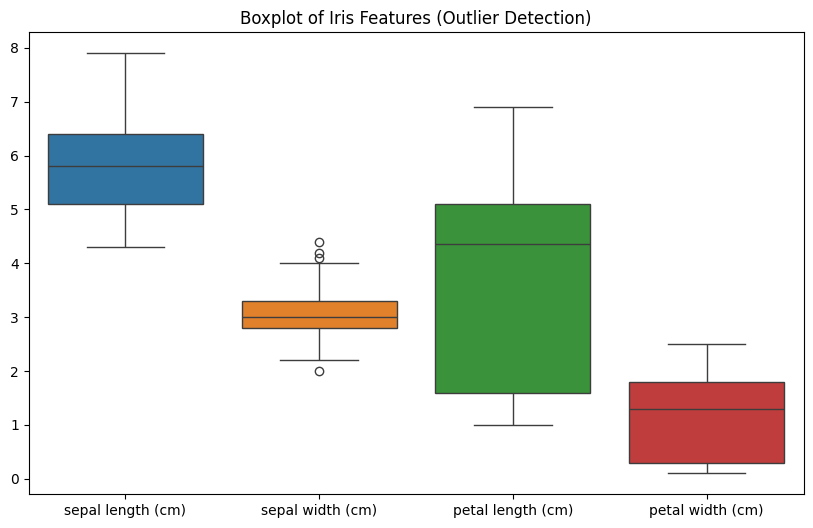

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Iris Features (Outlier Detection)")
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 120
Testing samples: 30


In [15]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [16]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [17]:
print(f"Accuracy on test set: {accuracy:.4f} ({accuracy*100:.2f}%)")

Accuracy on test set: 0.9667 (96.67%)
